# How are in-demand skills trending for Data Analysts?

#### Methology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [12]:
# Create a datafram that filters on Data Analyst and United States

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title'] == 'Data Analyst')].copy()

In [13]:
# We will aggregate on a monthly basis, so need to create a new column (job_posted_month_no) with month number using dt.month

df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month 

In [14]:
# Need to explode the job_skills column of the dataframe

df_DA_US_explode = df_DA_US.explode('job_skills')

In [15]:
df_DA_US_explode.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None,11
155,Data Analyst,Data Analyst,"Tampa, FL",via LinkedIn,Full-time,False,"Florida, United States",2023-01-19 13:19:45,False,False,United States,None,NaN,NaN,Citi,sql,"{'analyst_tools': ['excel'], 'async': ['jira']...",1


In [16]:
# We need to pivot the dataframe (df_DA_US_explode) and create a new dataframe (df_DA_US_pivot)
# will pivot on the index of job_posted_month_no and column will be job_skills
# the pivot will aggregate on 'size' becuase we are doing a count of the different skills
# any non-values will be filled in with a 0 (fill_value=0)

df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_US_pivot


job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [17]:
# With the above pivot, we need to create a new row for Total
# we need to sum the skills column for the new row called Total
# this will allow for sorting on the row of Total

df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [18]:
# Now we can sort with the new row of Total from above
# Syntax requires filtering on the row then sorting on the values in a descending order
# Need to include index because the data type is a series
# Assign the reults to the original dataframe for reference

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [19]:
# Now that we were able to sort, we need to drop the Total row, as it is no longer needed

df_DA_US_pivot = df_DA_US_pivot.drop('Total')

df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# To see what we are workin with we can plot the dataframe

df_DA_US_pivot.plot(kind='line')

In [22]:
# We need to get a percent of job postings so we will need determine total job postings per month to make the calculation
# exploring the totals by month using the original dataframe (df_DA_US)
# this aggreagates total Data Analyst job postings by month
# we will set this to DA_totals

DA_totals = df_DA_US.groupby('job_posted_month_no').size() 

DA_totals

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [25]:
# We can use the .div method to compare each row series to the total job postings
# because we are using the row and not the column axis=0
# to convert from decimal to percentage we divide DA_totals by 100
# set the result to a new dataframe (df_DA_US_percent)

df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, axis=0)

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
7,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
8,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


In [27]:
# We need to clean up the month in the dataframe (change from a number to a month) using the following:

# Reset the index
df_DA_US_percent = df_DA_US_percent.reset_index() # reset the index so job_posted_month_no can be a manipulated column

# Create a new column using the column of job_posted_month_no
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

# Set the index to the new column of job_posted_month
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')

# Drop the column of job_posted_month_no
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


In [28]:
# We are now ready to plot the dataframe (df_DA_US_percent)
# However, we only want the first 5 columns (job_skills)
# use iloc method to pull all the rows (job_posted_month) and only the first five columsn (job_skills)

df_DA_US_percent.iloc[:, :5]

job_skills,sql,excel,tableau,python,power bi
job_posted_month,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542
Feb,60.903427,42.367601,31.775701,29.439252,23.520249
Mar,58.883994,42.584435,33.994126,29.368576,20.337739
Apr,61.723886,42.147553,33.747261,30.752374,21.329438
May,61.072664,42.387543,31.747405,29.065744,21.712803
Jun,61.474731,40.679370,32.725766,32.808616,22.535211
Jul,58.638743,45.130890,30.994764,30.575916,19.895288
Aug,55.445545,45.332390,33.946252,32.531825,20.650636
Sep,56.658879,39.252336,32.359813,29.556075,21.378505


<Axes: xlabel='job_posted_month'>

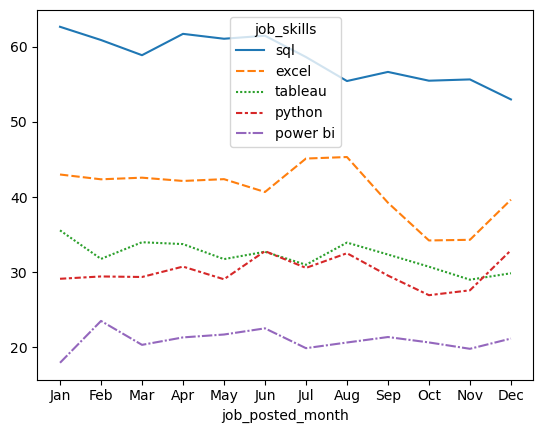

In [29]:
# We will set the dataframe above to df_plot so that we can plot with seaborn

df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot)

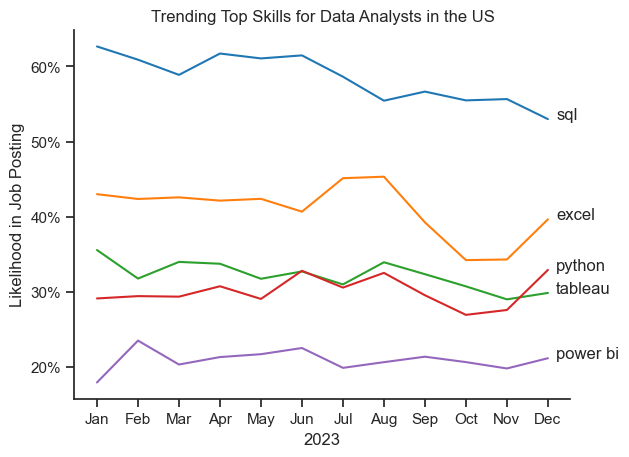

In [37]:
# Now we will clean up the plot

df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10') # remove the dashes and adjust the palette
sns.set_theme(style='ticks')

sns.despine() # remove the plot border

# clean up the titles and labels
plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

# we need to import PercentFormatter
from matplotlib.ticker import PercentFormatter

# format the yaxis with a percentage
ax = plt.gca() # gets the current axis
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))



for i in range(5): # iterate through the five columns (0, 1, 2, 3, 4)
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i]) # referencing the last row (11) and then labeling with the index
    #        11.2 moves the label over to the right


plt.show()
